In [1]:
#Bước 1: Import thư viện cần thiết
import numpy as np
import pandas as pd
import re

In [2]:
#Bước 2: Đọc dữ liệu
df = pd.read_excel('Diemthi_thpt_quocgia_2016.xlsx')

In [3]:
#Bước 3: Xem các thông tin cơ bản
df.shape

(34826, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34826 entries, 0 to 34825
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SOBAODANH   34826 non-null  object
 1   HO_TEN      34826 non-null  object
 2   NGAY_SINH   34826 non-null  object
 3   TEN_CUMTHI  34826 non-null  object
 4   GIOI_TINH   34826 non-null  object
 5   DIEM_THI    34826 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [5]:
df.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...


In [6]:
df.tail()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
34821,HUI014539,VÒNG NGỌC YẾN,15/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 0.75 Ngữ văn: 5.00 Hóa học: 4....
34822,HUI014540,VÒNG THANH YẾN,09/09/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.75 Ngữ văn: 5.75 Vật lí: 6.8...
34823,HUI014541,VŨ THỊ BẢO YẾN,19/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.00 Ngữ văn: 5.50 Vật lí: 5.6...
34824,HUI014542,VŨ THỊ YẾN,13/01/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 5.75 Ngữ văn: 6.00 Vật lí: 7.4...
34825,HUI014543,VƯƠNG THỊ YẾN,05/02/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 2.50 Ngữ văn: 4.25 Vật lí: 4.2...


In [7]:
df.loc[0, "DIEM_THI"]

'Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00'

In [8]:
#danh sách môn thi
ds_mon = ["Toán","Ngữ văn","Địa lí","Tiếng Anh","Sinh học","Vật lí","Hóa học","Lịch sử"]

In [9]:
df_mon_thi = pd.DataFrame(columns=ds_mon)

In [10]:
df_mon_thi

,Toán,Ngữ văn,Địa lí,Tiếng Anh,Sinh học,Vật lí,Hóa học,Lịch sử


In [11]:
chuoi_diem = 'Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00'
search_str = 'Toán:\s\s\s\d+.\d+'
ket_qua = re.match(search_str, chuoi_diem)
print(ket_qua)

<re.Match object; span=(0, 12), match='Toán:   2.00'>


In [12]:
kq = ket_qua.group().partition(":   ")

In [13]:
kq[0], kq[2]

('Toán', '2.00')

In [14]:
def tach_diem(chuoi_diem):
    ds_diem = {}
    for mon in ds_mon:
        search_str = mon + ':\s\s\s\d+.\d+'
        ket_qua = re.search(search_str, chuoi_diem)
        if ket_qua:
            kq = ket_qua.group().partition(":   ")
            ds_diem[mon] = [float(kq[2])]
        else:
            ds_diem[mon] = [np.nan]
    df_temp = pd.DataFrame(ds_diem)
    return df_temp

In [15]:
chuoi_diem = 'Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00'
tach_diem(chuoi_diem)

,Toán,Ngữ văn,Địa lí,Tiếng Anh,Sinh học,Vật lí,Hóa học,Lịch sử
0,2.0,5.5,5.0,NaN,NaN,NaN,NaN,3.0


In [16]:
for row_index in range(df.shape[0]):
    chuoi_diem = df["DIEM_THI"][row_index]
    df_temp = tach_diem(chuoi_diem)
    df_mon_thi = pd.concat([df_mon_thi, df_temp], ignore_index=True, sort=False)

In [17]:
df_mon_thi.head()

,Toán,Ngữ văn,Địa lí,Tiếng Anh,Sinh học,Vật lí,Hóa học,Lịch sử
0,2.00,5.50,5.00,NaN,NaN,NaN,NaN,3.0
1,5.50,5.25,5.50,3.68,NaN,NaN,NaN,NaN
2,4.50,5.50,3.75,2.25,NaN,NaN,NaN,NaN
3,3.00,6.00,5.50,1.50,NaN,NaN,NaN,NaN
4,2.25,4.75,5.25,2.00,NaN,NaN,NaN,NaN


In [18]:
df_new = pd.concat([df, df_mon_thi], axis=1)

In [19]:
df_new.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI,Toán,Ngữ văn,Địa lí,Tiếng Anh,Sinh học,Vật lí,Hóa học,Lịch sử
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....,2.00,5.50,5.00,NaN,NaN,NaN,NaN,3.0
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...,5.50,5.25,5.50,3.68,NaN,NaN,NaN,NaN
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...,4.50,5.50,3.75,2.25,NaN,NaN,NaN,NaN
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...,3.00,6.00,5.50,1.50,NaN,NaN,NaN,NaN
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...,2.25,4.75,5.25,2.00,NaN,NaN,NaN,NaN


In [20]:
df_new.shape

(34826, 14)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

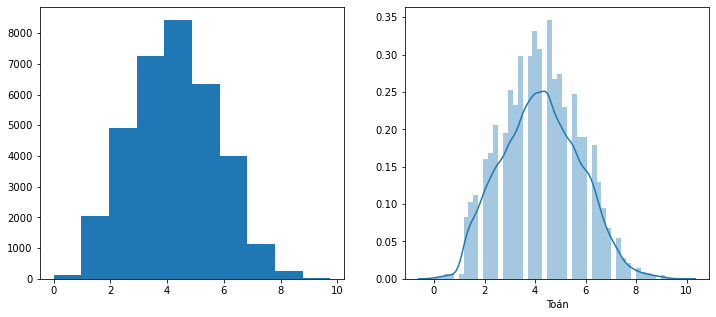

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df_new['Toán'].dropna())
plt.subplot(1,2,2)
sns.distplot(df_new['Toán'].dropna())
plt.show()